#                               PREDICTING USED CARS PRICES

In [ ]:
#Project done by: Adhith Sankar

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [304]:
data.shape

(6019, 12)

In [305]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [306]:
data.nunique(axis=0)

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [307]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [308]:
#Checking null values

data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [309]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,5977.000000,6019.000000
mean,2013.358199,58738.380296,5.278735,9.479468
std,3.269742,91268.843206,0.808840,11.187917
min,1998.000000,171.000000,0.000000,0.440000
25%,2011.000000,34000.000000,5.000000,3.500000
50%,2014.000000,53000.000000,5.000000,5.640000
75%,2016.000000,73000.000000,5.000000,9.950000
max,2019.000000,6500000.000000,10.000000,160.000000


In [310]:
print('Mean of price:',data.Price.mean())
print('Median of price:',data.Price.median())

Mean of price: 9.479468350224273
Median of price: 5.64


In [311]:
#data filtering

data_null = data.isna().mean()
data_null.sort_values(ascending = False).head()

Seats      0.006978
Power      0.005981
Engine     0.005981
Mileage    0.000332
Price      0.000000
dtype: float64

In [312]:
for c in ['Engine', 'Seats','Mileage','Power']:
    data[c].fillna(data[c].mode()[0], inplace=True)

In [313]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Q1 value: 3.5
Median value: 5.64
Q3 value: 9.95
Upper whisker limit: 19.625
Lower whisker limit: 13.174999999999999


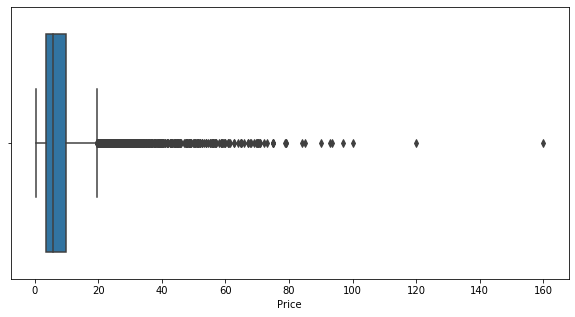

In [314]:
#detecting outliers by boxplot

sns.boxplot(data['Price'])
Q3=data.Price.quantile(.75)
Q1=data.Price.quantile(.25)
IQR=Q3-Q1
Median=data.Price.median()
print("Q1 value:",Q1)
print("Median value:",data.Price.median())
print("Q3 value:",Q3)
print("Upper whisker limit:",(Q3+1.5*IQR))
print("Lower whisker limit:",(Q1+1.5*IQR))

In [315]:
#extracting car company

data['Name'] = data['Name'].str.split(' ', expand = True)
data['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [316]:
#Typing error in Isuzu

In [317]:
data['Name'] = data['Name'].replace({'ISUZU' : 'Isuzu'})
data['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [318]:
data['Owner_Type'] = data['Owner_Type'].astype(str)
data.loc[data.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2940,Maruti,Kolkata,2016,29000,Diesel,Manual,First,27.39 kmpl,1248 CC,74 bhp,5.0,6.50
4781,Maruti,Hyderabad,2007,52195,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,1.75


In [319]:
# Segregation of numerical & categorical values

colms = data.columns
num_colms = data._get_numeric_data().columns
ctg_colms = set(colms) - set(num_colms)

# DATA VISUALISATION

Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

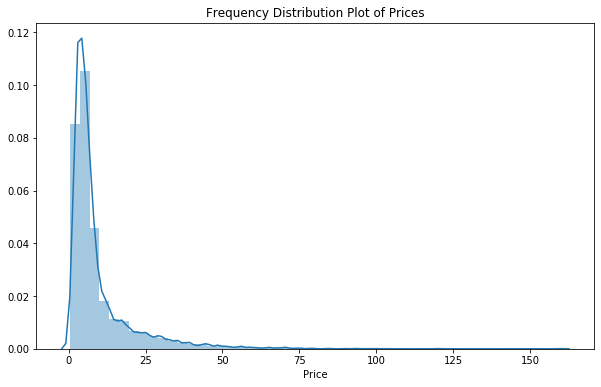

In [320]:
x = data.Price
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

Text(0, 0.5, 'Count of Cars')

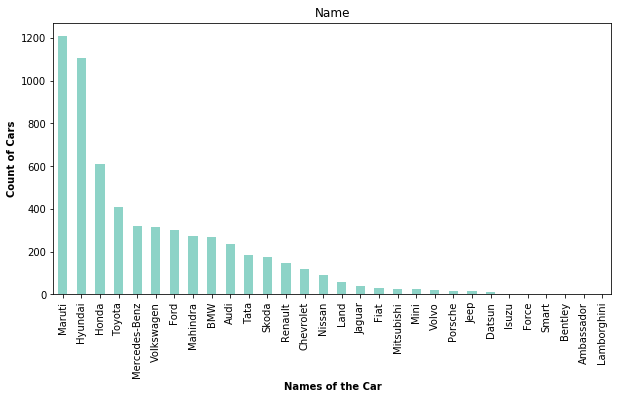

In [321]:
plt.rcParams['figure.figsize'] = [10,5]
ax = data['Name'].value_counts().plot(kind='bar', colormap='Set3')
ax.title.set_text('Name')
plt.xlabel("Names of the Car", fontweight = 'bold')
plt.ylabel("Count of Cars", fontweight = 'bold')

<Figure size 864x288 with 0 Axes>

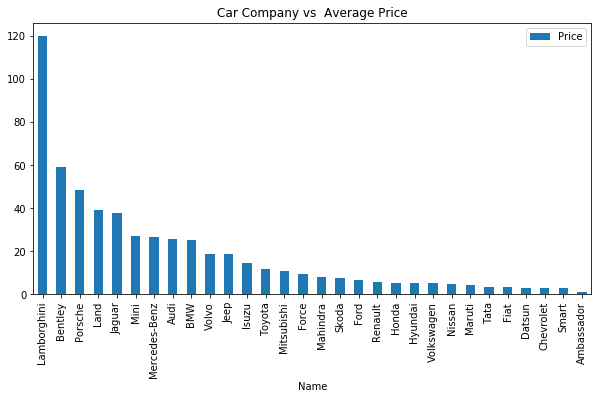

In [322]:
plt.figure(figsize=(12,4))
data_comp = pd.DataFrame(data.groupby(['Name'])['Price'].mean().sort_values(ascending = False))
data_comp.plot.bar()
plt.title('Car Company vs  Average Price')
plt.show()

<Figure size 864x288 with 0 Axes>

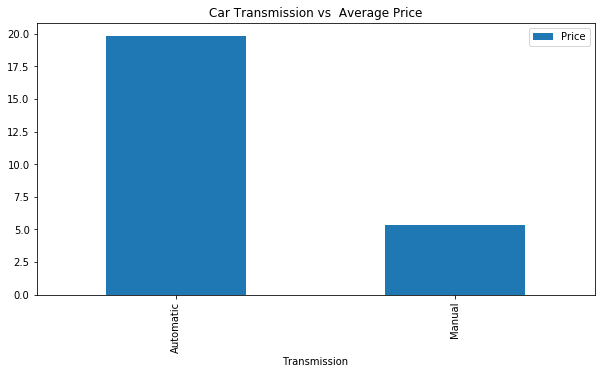

In [323]:
plt.figure(figsize=(12,4))
data_comp = pd.DataFrame(data.groupby(['Transmission'])['Price'].mean().sort_values(ascending = False))
data_comp.plot.bar()
plt.title('Car Transmission vs  Average Price')
plt.show()

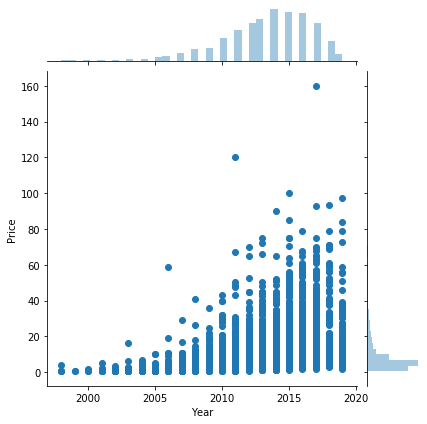

In [324]:
sns.jointplot(y='Price',x='Year',data=data)

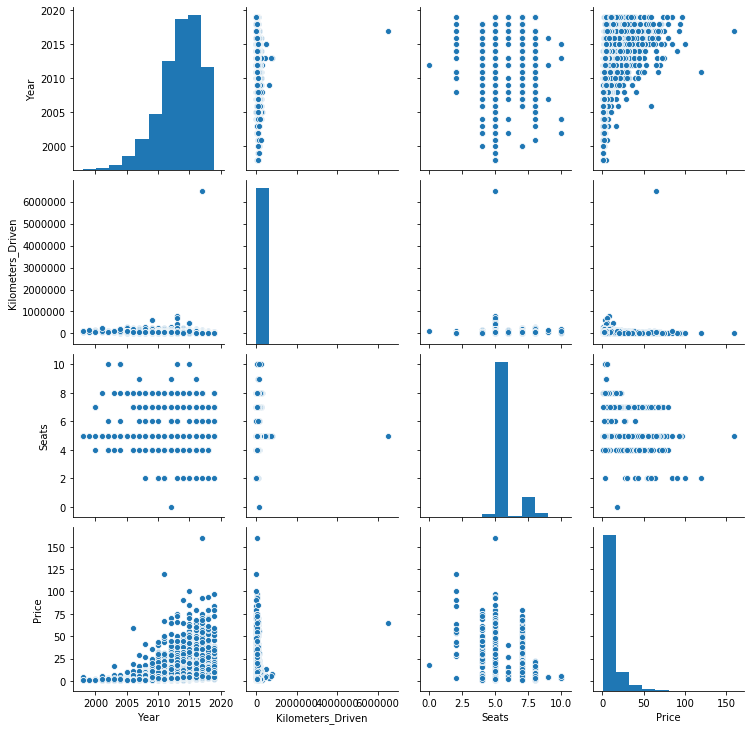

In [325]:
nums = sns.pairplot(data[num_colms])

[Text(0, 0.5, 'Frequency of Year'), Text(0.5, 0, 'Year')]

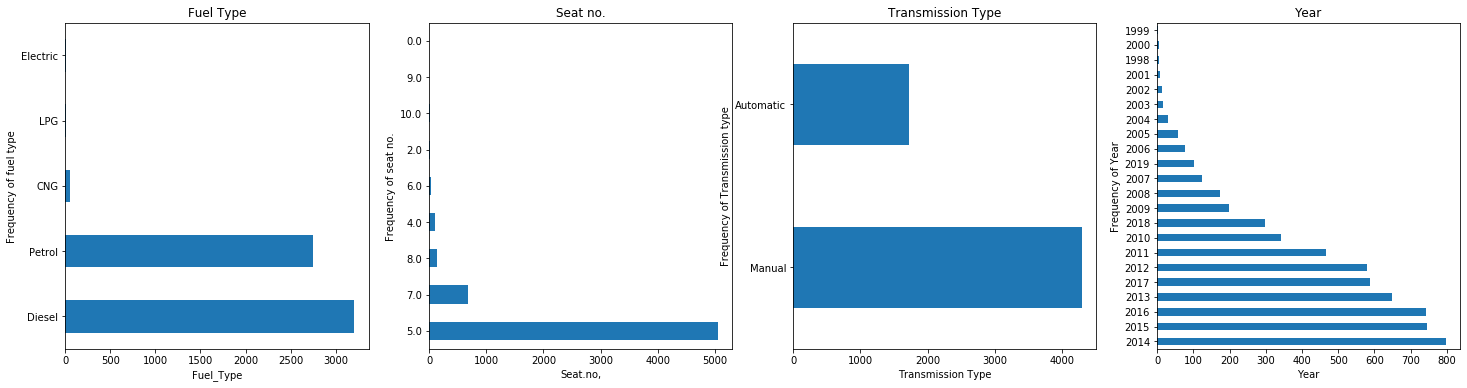

In [326]:
plt.figure(figsize = (25,6))

plt.subplot(1,4,1)
plt1 = data['Fuel_Type'].value_counts().plot(kind = 'barh')
plt.title("Fuel Type")
plt1.set(xlabel ="Fuel_Type", ylabel = "Frequency of fuel type")

plt.subplot(1,4,2)
plt2 = data['Seats'].value_counts().plot(kind = 'barh')
plt.title("Seat no.")
plt2.set(xlabel = "Seat.no,", ylabel = "Frequency of seat no.")

plt.subplot(1,4,3)
plt3 = data['Transmission'].value_counts().plot(kind = 'barh')
plt.title("Transmission Type")
plt3.set(xlabel = "Transmission Type", ylabel = "Frequency of Transmission type")

plt.subplot(1,4,4)
plt4=data['Year'].value_counts().plot(kind='barh')
plt.title("Year")
plt4.set(xlabel="Year",ylabel="Frequency of Year")

In [327]:
data['Power'] = data['Power'].str.rstrip('bhpnull')
data['Mileage'] = data['Mileage'].str.rstrip('km/kgpl')
data['Engine'] = data['Engine'].str.rstrip('C')
data['Power'] = data['Power'].str.replace('null', '0')
data.dropna()


data['Price'] = data['Price'].astype('int')
df_auto_temp = data.copy()
t = df_auto_temp.groupby(['Name'])['Price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left', on='Name')
bins = [0, 7, 15, 30]
label = ['Budget_Friendly', 'Medium range', 'TopNotch_Cars']
data['Cars_Category'] = pd.cut(df_auto_temp['Price_y'], bins, right=False, labels=label)
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars_Category
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1,Budget_Friendly
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12,Budget_Friendly
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4,Budget_Friendly
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6,Budget_Friendly
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17,TopNotch_Cars


# DATA PREPARATION

In [328]:
#creating dummy variables

a = ['Cars_Category', 'Transmission'] 
dummies = pd.get_dummies(data[a]) 
dummies.shape

(6019, 5)

In [329]:
dummies = pd.get_dummies(data[a], drop_first = False)
dummies.shape

(6019, 5)

In [330]:
data = pd.concat([data, dummies], axis = 1)
data.drop(a, axis=1, inplace = True)
data.shape

(6019, 16)

# TRAINING AND TESTING

In [331]:
train_data = data
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars_Category_Budget_Friendly,Cars_Category_Medium range,Cars_Category_TopNotch_Cars,Transmission_Automatic,Transmission_Manual
0,Maruti,Mumbai,2010,72000,CNG,First,26.6,998,58.16,5.0,1,1,0,0,0,1
1,Hyundai,Pune,2015,41000,Diesel,First,19.67,1582,126.2,5.0,12,1,0,0,0,1
2,Honda,Chennai,2011,46000,Petrol,First,18.2,1199,88.7,5.0,4,1,0,0,0,1
3,Maruti,Chennai,2012,87000,Diesel,First,20.77,1248,88.76,7.0,6,1,0,0,0,1
4,Audi,Coimbatore,2013,40670,Diesel,Second,15.2,1968,140.8,5.0,17,0,0,1,1,0


In [332]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
b = [ 'Year', 'Kilometers_Driven','Mileage', 'Engine','Power', 'Seats']
train_data[b] = scaler.fit_transform(train_data[b])
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars_Category_Budget_Friendly,Cars_Category_Medium range,Cars_Category_TopNotch_Cars,Transmission_Automatic,Transmission_Manual
0,Maruti,Mumbai,-1.027139,0.145315,CNG,First,1.847863,-1.033882,-0.954489,-0.343293,1,1,0,0,0,1
1,Hyundai,Pune,0.502161,-0.194369,Diesel,First,0.335156,-0.061191,0.274454,-0.343293,12,1,0,0,0,1
2,Honda,Chennai,-0.721279,-0.139581,Petrol,First,0.014279,-0.699103,-0.402874,-0.343293,4,1,0,0,0,1
3,Maruti,Chennai,-0.415419,0.309678,Diesel,First,0.575268,-0.617491,-0.401790,2.137237,6,1,0,0,0,1
4,Audi,Coimbatore,-0.109559,-0.197985,Diesel,Second,-0.640572,0.581718,0.538160,-0.343293,17,0,0,1,1,0


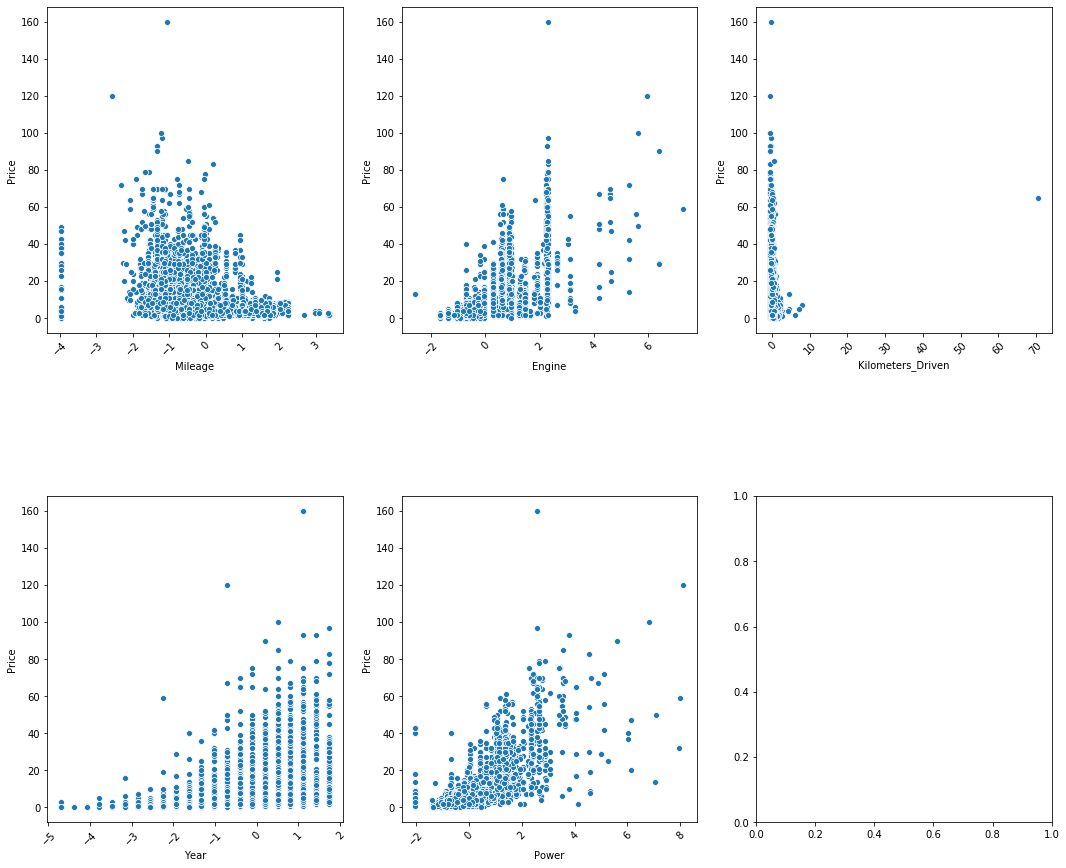

In [336]:
col = ['Mileage', 'Engine', 'Kilometers_Driven', 'Year','Power']
fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an = sns.scatterplot(x=col, y='Price', data=data, ax = axes[x,y])
    plt.setp(an.get_xticklabels(), rotation = 45)
plt.subplots_adjust(hspace = 0.5)

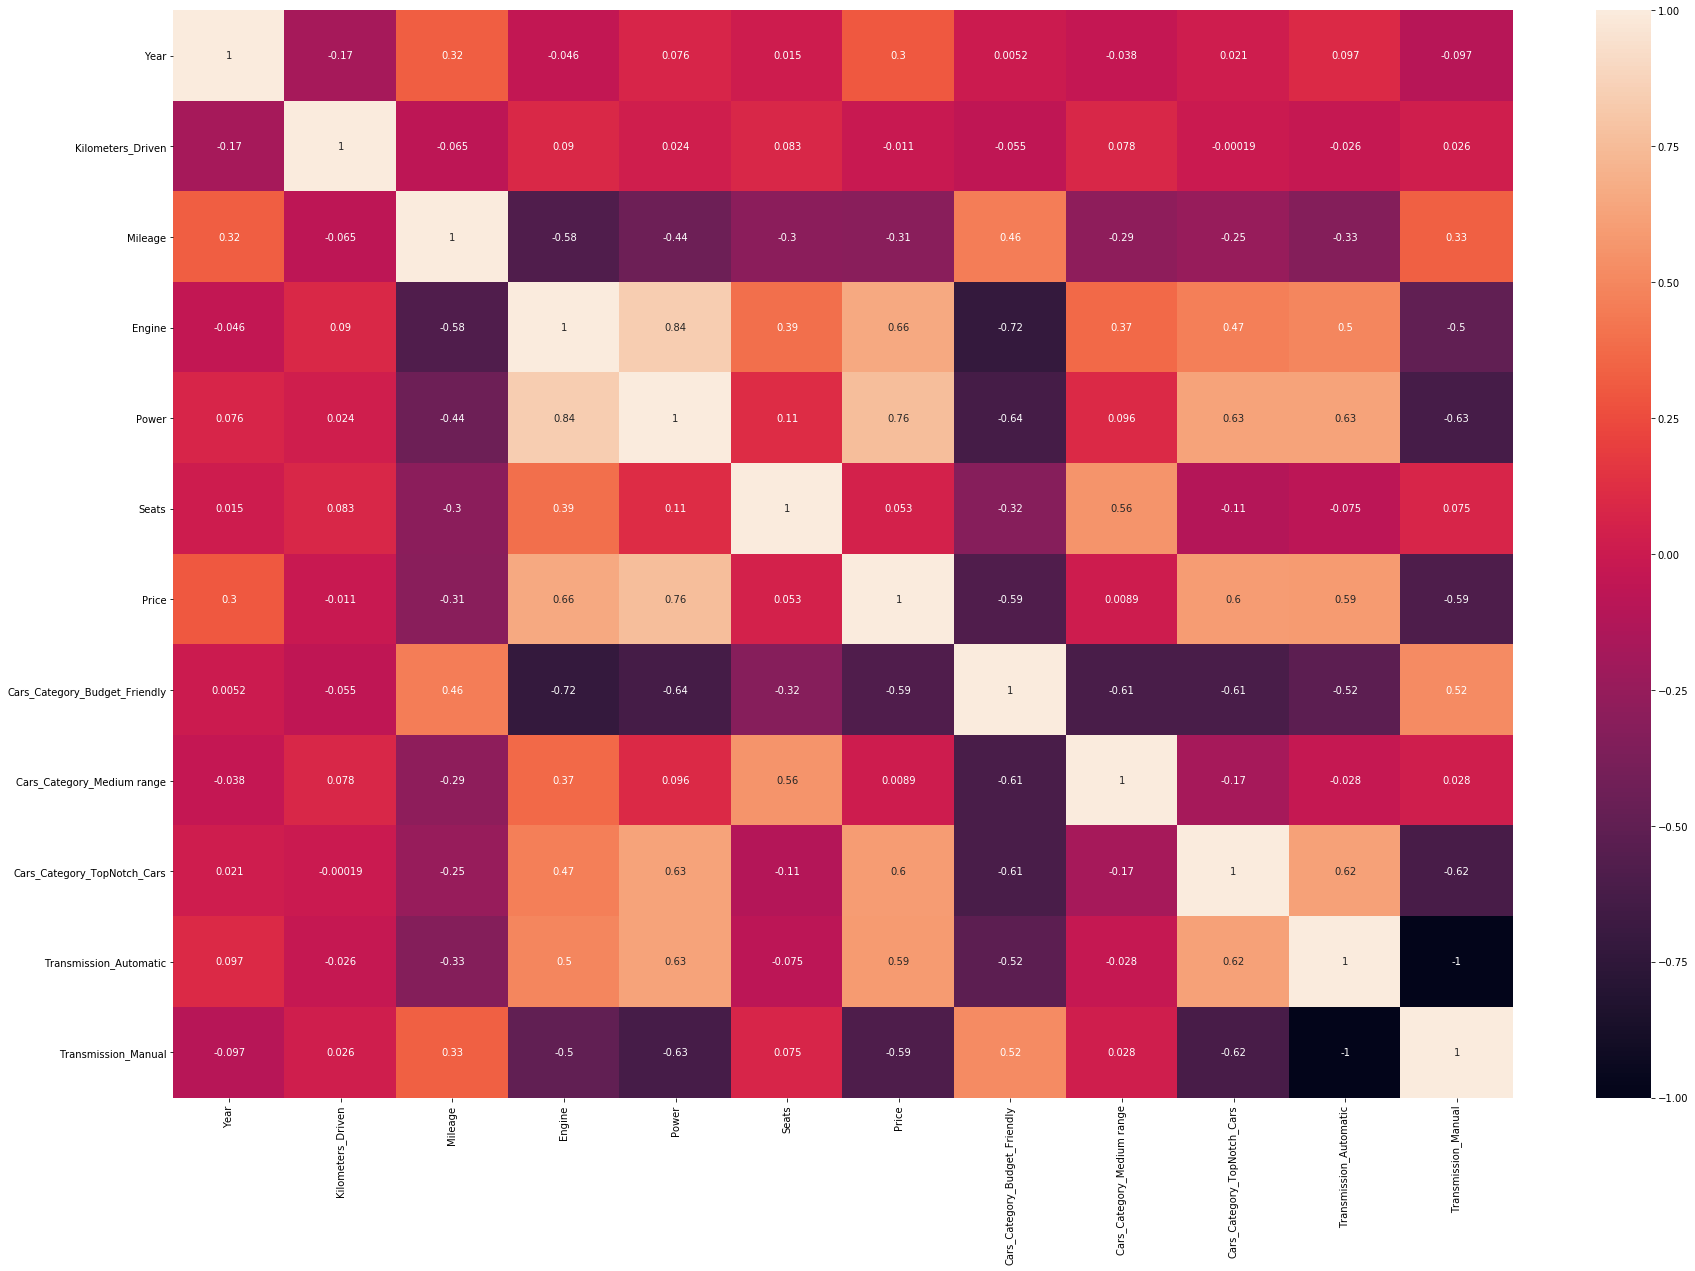

In [257]:
plt.figure(figsize=(30,20))
sns.heatmap(train_data.corr(), annot = True)
plt.show()

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [259]:
y_train = train_data.pop('Price')
X_train = train_data

# LINEAR MODEL BUILDING

In [260]:
X_train_1 = X_train['Mileage']
X_train_1_1 = sm.add_constant(X_train_1)
lnr_reg_1 = sm.OLS(y_train, X_train_1_1).fit()
lnr_reg_1.params

const      9.006147
Mileage   -3.450682
dtype: float64

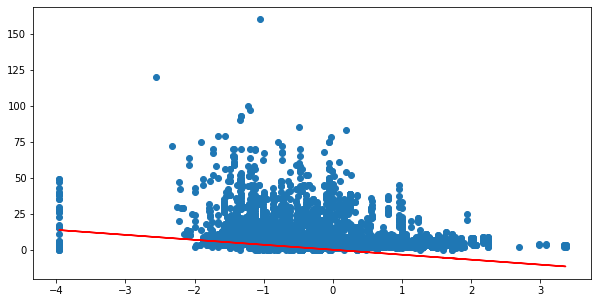

In [261]:
plt.scatter(X_train_1_1.iloc[:, 1], y_train)
plt.plot(X_train_1_1.iloc[:, 1], -3.4507*X_train_1_1.iloc[:, 1], 'r')
plt.show()

In [262]:
print(lnr_reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     627.6
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          7.91e-132
Time:                        17:55:17   Log-Likelihood:                -22799.
No. Observations:                6019   AIC:                         4.560e+04
Df Residuals:                    6017   BIC:                         4.561e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0061      0.138     65.383      0.0

In [263]:
X_train_2 = X_train[['Mileage', 'Engine']]
X_train_2_1 = sm.add_constant(X_train_2)
lnr_reg_2 = sm.OLS(y_train, X_train_2_1).fit()
lnr_reg_2.params

const      9.006147
Mileage    1.270350
Engine     8.122874
dtype: float64

In [264]:
print(lnr_reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     2373.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:55:17   Log-Likelihood:                -21347.
No. Observations:                6019   AIC:                         4.270e+04
Df Residuals:                    6016   BIC:                         4.272e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0061      0.108     83.212      0.0

In [265]:
X_train_3  = X_train[['Mileage', 'Engine','Year', 'Kilometers_Driven', 'Seats','Power']]
X_train_3_1 = sm.add_constant(X_train_3)
lnr_reg_3  = sm.OLS(y_train, X_train_3_1).fit()
lnr_reg_3.params

const                9.006147
Mileage             -0.847690
Engine               2.965456
Year                 3.452590
Kilometers_Driven    0.145832
Seats               -1.501653
Power                5.543813
dtype: float64

In [266]:
print(lnr_reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1922.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:55:17   Log-Likelihood:                -19874.
No. Observations:                6019   AIC:                         3.976e+04
Df Residuals:                    6012   BIC:                         3.981e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0061      0.08

# RECURSIVE FEATURE ELIMINATION

In [267]:
X_train = X_train.drop('Name', axis = 1)
X_train = X_train.drop('Location', axis = 1)
X_train = X_train.drop('Owner_Type', axis = 1)
X_train = X_train.drop('Fuel_Type', axis = 1)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [268]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Kilometers_Driven', True, 1),
 ('Mileage', True, 1),
 ('Engine', True, 1),
 ('Power', True, 1),
 ('Seats', True, 1),
 ('Cars_Category_Budget_Friendly', True, 1),
 ('Cars_Category_Medium range', True, 1),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('Transmission_Automatic', True, 1),
 ('Transmission_Manual', True, 1)]

In [269]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Cars_Category_Budget_Friendly', 'Cars_Category_Medium range',
       'Cars_Category_TopNotch_Cars', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [270]:
X_train_rfe = X_train[col_sup]

In [271]:
import statsmodels.api as sm
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1775.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:                -18959.
No. Observations:                6019   AIC:                         3.794e+04
Df Residuals:                    6008   BIC:                         3.801e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [272]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,Transmission_Manual,47.04
9,Transmission_Automatic,18.05
6,Cars_Category_Budget_Friendly,15.12
7,Cars_Category_Medium range,9.09
8,Cars_Category_TopNotch_Cars,7.33
3,Engine,6.56
4,Power,5.95
2,Mileage,1.84
5,Seats,1.82
0,Year,1.30


In [273]:
X_train_rfe_1 = X_train_rfe.drop('Transmission_Manual', 1,)
X_train_rfe_1_1 = sm.add_constant(X_train_rfe_1)
lm_rfe_1 = sm.OLS(y_train, X_train_rfe_1_1).fit()
print(lm_rfe_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1775.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:                -18959.
No. Observations:                6019   AIC:                         3.794e+04
Df Residuals:                    6008   BIC:                         3.801e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [274]:
X_train_rfe_2 = X_train_rfe_1.drop('Cars_Category_Budget_Friendly', 1,)
X_train_rfe_2_1 = sm.add_constant(X_train_rfe_2)
lm_rfe_2 = sm.OLS(y_train, X_train_rfe_2_1).fit()
print(lm_rfe_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1499.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:                -19555.
No. Observations:                6019   AIC:                         3.913e+04
Df Residuals:                    6009   BIC:                         3.920e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [275]:
X_train_rfe_3 = X_train_rfe_2.drop('Cars_Category_TopNotch_Cars', 1,)
X_train_rfe_3_1 = sm.add_constant(X_train_rfe_3)
lm_rfe_3 = sm.OLS(y_train, X_train_rfe_3_1).fit()
print(lm_rfe_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1571.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:                -19701.
No. Observations:                6019   AIC:                         3.942e+04
Df Residuals:                    6010   BIC:                         3.948e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [276]:
X_train_rfe_4 = X_train_rfe_3.drop('Cars_Category_Medium range', 1,)
X_train_rfe_4_1 = sm.add_constant(X_train_rfe_4)
lm_rfe_4 = sm.OLS(y_train, X_train_rfe_4_1).fit()
print(lm_rfe_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1729.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:                -19777.
No. Observations:                6019   AIC:                         3.957e+04
Df Residuals:                    6011   BIC:                         3.962e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8

In [277]:
X_train_rfe_5 = X_train_rfe_4.drop('Transmission_Automatic', 1,)
X_train_rfe_5_1 = sm.add_constant(X_train_rfe_5)
lm_rfe_5 = sm.OLS(y_train, X_train_rfe_5_1).fit()
print(lm_rfe_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1922.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:55:19   Log-Likelihood:                -19874.
No. Observations:                6019   AIC:                         3.976e+04
Df Residuals:                    6012   BIC:                         3.981e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0061      0.08

In [287]:
lm.score(X_train,y_train)

0.7471404344715975

# MODEL1

In [279]:
y_train_Price = lm_rfe_5.predict(X_train_rfe_5_1)

Text(0.5, 0, 'Error')

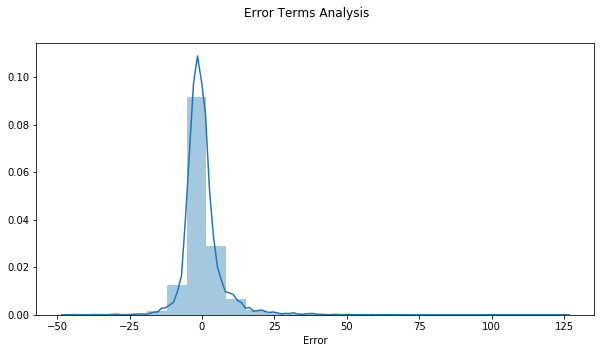

In [280]:
fig = plt.figure()
sns.distplot((y_train - y_train_Price), bins = 25)
fig.suptitle('Error Terms Analysis')
plt.xlabel('Error')

# PREDICTION USING FINAL MODEL

In [281]:
test_data = pd.read_excel('Data_Test.xlsx')
test_data['Power'] = test_data['Power'].str.replace('null', '0')

In [282]:
for c in [ 'Engine', 'Seats','Mileage','Power']:
    test_data[c].fillna(test_data[c].mode()[0], inplace=True)

In [283]:
test_data['Mileage'] = test_data['Mileage'].str.rstrip('kg/kmpl')
test_data['Power'] = test_data['Power'].str.rstrip('bhpnull')
test_data['Engine'] = test_data['Engine'].str.rstrip('C')

In [337]:
X_test = test_data
X_test_1 = sm.add_constant(X_test)
X_test_new = X_test_1[X_train_rfe_5_1.columns]

In [ ]:
y_pred = lm_rfe_5.predict(X_test_new)